>>[Домашнє завдання.](#scrollTo=bbgnNVqTFRpF)

>>>[Завдання](#scrollTo=wNzZNwYKMFWo)

>>>[Розв'язок](#scrollTo=iIWzSpsTMIiY)



In [ ]:
!pip install pycaret[full]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
def data_scale(data, scaler_type='minmax'):
    from sklearn.preprocessing import MinMaxScaler
    from sklearn.preprocessing import StandardScaler
    from sklearn.preprocessing import Normalizer
    if scaler_type == 'minmax':
        scaler = MinMaxScaler()
    if scaler_type == 'std':
        scaler = StandardScaler()
    if scaler_type == 'norm':
        scaler = Normalizer()

    scaler.fit(data)
    res = scaler.transform(data)
    return res

##Домашнє завдання 2


###Завдання
    

 1. Завантаж дані набору Iris за допомогою функції load_iris() з бібліотеки sklearn.

 2. Додай описовий аналіз даних з попереднього домашнього завдання.

 3. Виконай розділення набору даних для частини тренування та тестування. Для цього використай функцію train_test_split() з біблітеки sklearn.

 4. Створи класифікатор на основі дерев розв'язків. Для цього використовується функція  DecisionTreeClassifier() з бібліотеки sklearn.

 5. Використай функцію cross_val_test() з конспекту для порівняння ефективності роботи класифікатора на даних для тестування та тренування у випадку використання крос-валідації.

 6. Візуалізуй отримане дерево розв'язку за допомогою функції plot_tree() модуля tree бібліотеки sklearn.

 7. Візуалізуй границю прийняття рішення за допомогою функції DecisionBoundaryDisplay() бібліотеки sklearn.

 8. Створи класифікатор випадковий ліс за допомогою функції RandomForestClassifier.

 9. Оціни точність класифікатора за допомогою функції cross_val_test().  

 10. Проведи декілька обчислювальних екпериментів та  оціни оптимальний набір гіперпараметрів за результатами експериментів.


    
**Пiдказки**

- Для виконання завдання використовуй функції sklearn, numpy, pandas з конспекту до цієї теми.


###Розв'язок

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
print(iris.keys())



dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


# Описовий аналіз даних

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Набір даних Iris - це класичний набір даних у сфері машинного навчання, який часто використовується для демонстрації алгоритмів класифікації та кластеризації. Цей набір даних описує характеристики трьох класів рослин Iris.

**Ознаки (атрибути) набору даних Iris:**

1. **Довжина чашелистника (sepal length).** Вимірюється в сантиметрах та представляє довжину першого чашелистника квітки.

2. **Ширина чашелистника (sepal width).** Вимірюється в сантиметрах та представляє ширину першого чашелистника квітки.

3. **Довжина пелюстки (petal length).** Вимірюється в сантиметрах та представляє довжину першої пелюстки квітки.

4. **Ширина пелюстки (petal width).** Вимірюється в сантиметрах та представляє ширину першої пелюстки квітки.

**Клас (цільова змінна):**

Кожен запис у наборі даних Iris відноситься до одного з трьох видів ірису:

1. **Iris-setosa**
2. **Iris-versicolor**
3. **Iris-virginica**

Кожен вид ірису має свої характерні особливості щодо довжини та ширини чашелистника та пелюстки, що дозволяє використовувати цей набір даних для вивчення та демонстрації алгоритмів класифікації в машинному навчанні.

In [ ]:
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
df_iris = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df_iris.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
df_iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df_target_iris = pd.DataFrame(iris['target'], columns =[ 'species'])
df_iris_all = pd.concat([df_iris, df_target_iris], axis=1)

In [ ]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


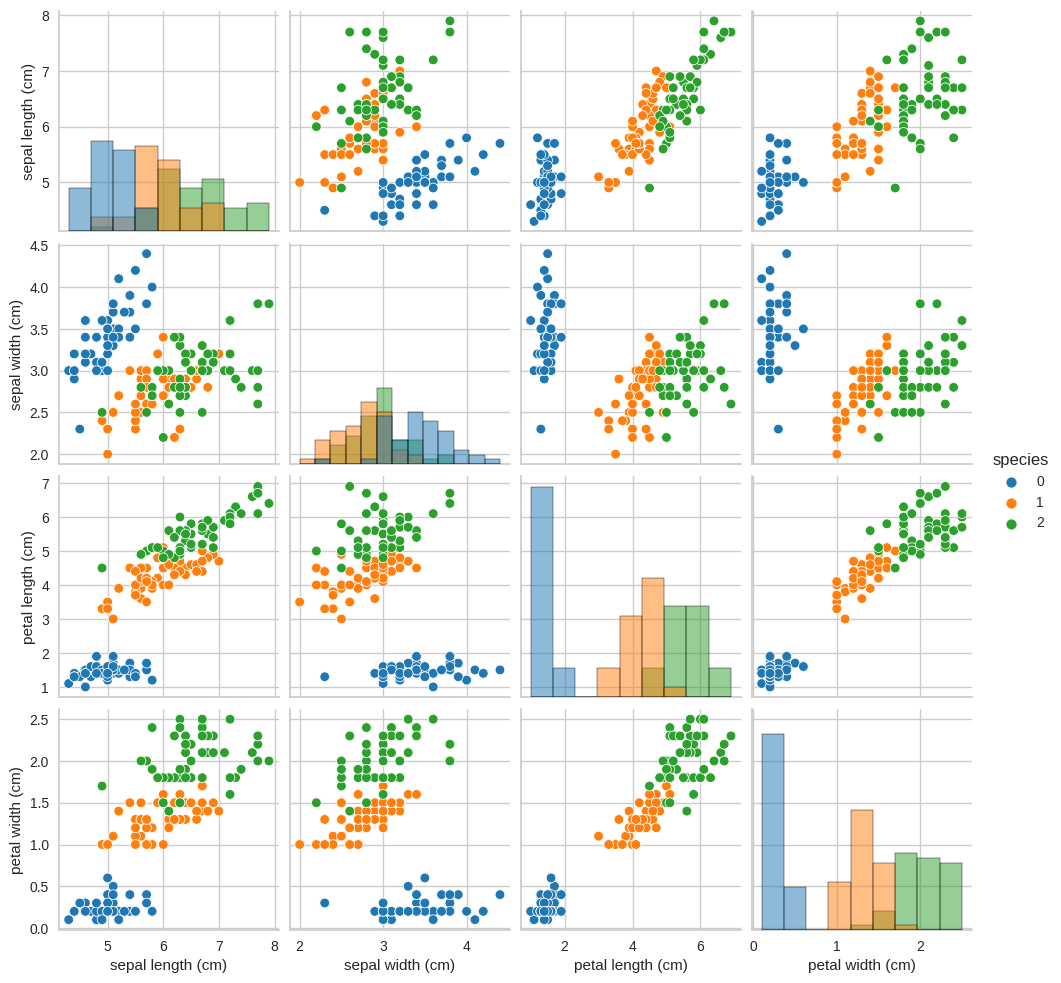

In [ ]:

sns.pairplot(df_iris_all, hue='species', palette= "tab10", diag_kind='hist')

In [ ]:
X_iris, y_iris = df_iris, df_target_iris
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(
    X_iris, y_iris, test_size=0.2, shuffle=True
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

cls_tree_iris = DecisionTreeClassifier(max_depth=10, random_state= 1)
cls_tree_iris.fit(X_train_iris, y_train_iris)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       random_state=1, splitter='best')

In [ ]:
cross_val_test(cls_tree_iris, X_iris, y_iris, model_type='classification')

{'fit_time': array([0.0095551 , 0.00538468, 0.00319242, 0.00337768, 0.00304651]),
 'score_time': array([0.01459455, 0.01205492, 0.00673342, 0.00675726, 0.00667262]),
 'test_f1': array([0.93333333, 0.96666667, 0.93333333, 0.93333333, 0.9       ]),
 'train_f1': array([1., 1., 1., 1., 1.])}

In [ ]:
text_representation_iris = tree.export_text(cls_tree_iris)
print(text_representation_iris)

|--- feature_3 <= 0.80
|   |--- class: 0
|--- feature_3 >  0.80
|   |--- feature_3 <= 1.75
|   |   |--- feature_2 <= 5.05
|   |   |   |--- feature_0 <= 4.95
|   |   |   |   |--- feature_3 <= 1.35
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  1.35
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_0 >  4.95
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  5.05
|   |   |   |--- feature_0 <= 6.05
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  6.05
|   |   |   |   |--- class: 2
|   |--- feature_3 >  1.75
|   |   |--- feature_2 <= 4.85
|   |   |   |--- feature_1 <= 3.10
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.10
|   |   |   |   |--- class: 1
|   |   |--- feature_2 >  4.85
|   |   |   |--- class: 2



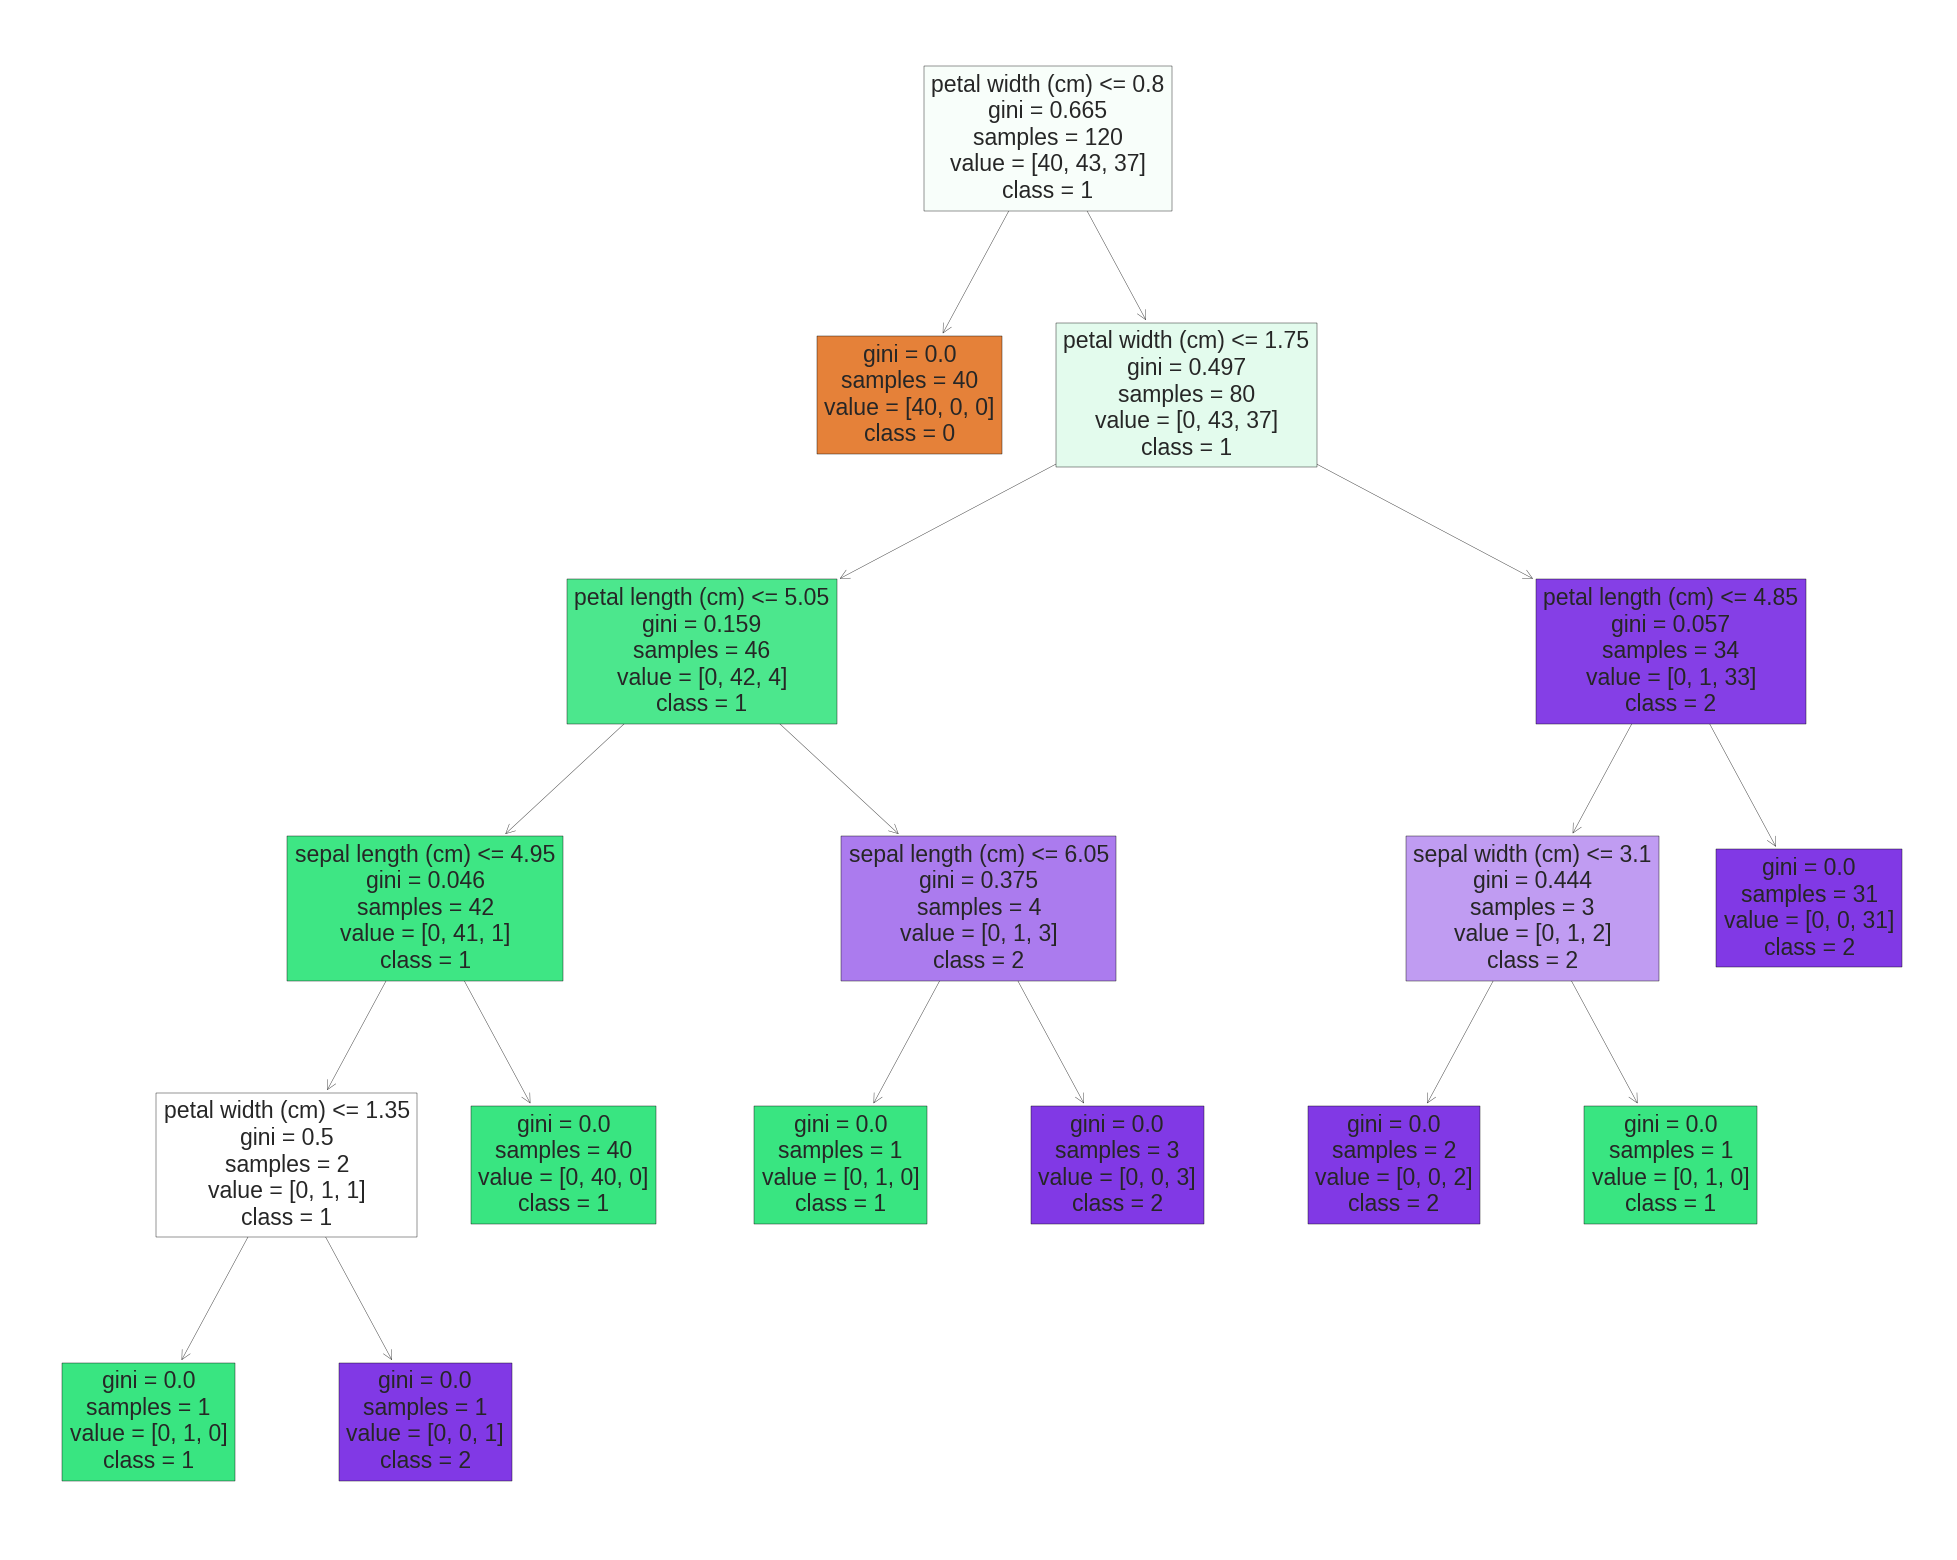

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(cls_tree_iris,
                   feature_names=list(iris.feature_names),
                   class_names=['0', '1', '2'],
                   filled=True)

In [ ]:
X_iris.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

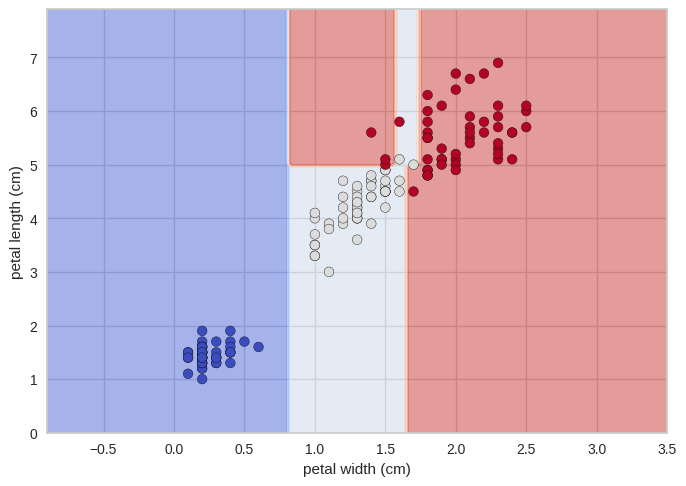

In [ ]:
dfrom sklearn.inspection import DecisionBoundaryDisplay

X_train_cols_iris = X_iris[['petal width (cm)', 'petal length (cm)']]

# Creating and fitting the tree classifier
model = DecisionTreeClassifier(max_depth=4,
                                    random_state=42).fit(X_train_cols, y)

# Plotting the tree boundaries
disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X_train_cols_iris,
                                              response_method="predict",
                                              xlabel='petal width (cm)',
                                              ylabel='petal length (cm)',
                                              alpha=0.5,
                                              cmap=plt.cm.coolwarm)

# Plotting the data points
disp.ax_.scatter(df_iris_all['petal width (cm)'], df_iris_all['petal length (cm)'],
                 c=df_iris_all['species'], edgecolor="k",
                 cmap=plt.cm.coolwarm)

# plt.title(f"Decision surface for tree trained on {data.feature_names[0]} and {data.feature_names[1]}
# ")
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf_rf_iris = RandomForestClassifier(max_depth=2, random_state=0)
clf_rf_iris.fit(X_train ,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=100, n_jobs=None, oob_score=False,
                       random_state=0, verbose=0, warm_start=False)

In [ ]:
cross_val_test(clf_rf, X, y, model_type='classification')

{'fit_time': array([0.19777918, 0.22936392, 0.23377895, 0.24029851, 0.24709654]),
 'score_time': array([0.02142644, 0.02080154, 0.02048659, 0.01966143, 0.02136493]),
 'test_f1': array([1.        , 1.        , 0.96666667, 0.86666667, 0.93333333]),
 'train_f1': array([0.95      , 0.95833333, 0.95833333, 0.98333333, 0.96666667])}